<a href="https://colab.research.google.com/github/nagayoshi3/deep_learning_practice/blob/master/1_1_mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ニューラルネットワーク の基礎1

## データの取得

11493376/11490434 [==============================] - 0s 0us/step
(60000, 784)
(10000, 784)


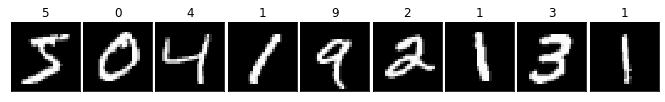

In [0]:
from tensorflow.keras.datasets import mnist

# データの読み込み
(x_train, y_train), (x_test, y_test) = mnist.load_data()


%matplotlib inline
import matplotlib.pyplot as plt


# 画像の表示
fig = plt.figure(figsize=(9, 15))
fig.subplots_adjust(left=0, right=1, bottom=0, top=0.5, hspace=0.05, wspace=0.05)

for i in range(9):
    ax = fig.add_subplot(1, 9, i + 1, xticks=[], yticks=[])
    ax.set_title(str(y_train[i]))
    ax.imshow(x_train[i], cmap='gray')


# データの整形
from tensorflow.keras.utils import to_categorical

x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)
# 画像データを784の数字の列に変換しています。

# データセットのサイズ
print(x_train.shape) # 訓練データ
print(x_test.shape) # テストデータ


y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## モデルの構築

どんなlayer（層）をどこに配置するか、また各layerのユニット数はいくつかを指定していきます。


このモデルを構築するための「容器」として機能するのが、keras.models.Sequentialクラスです。


この「容器」の中に、Sequential.add関数によってkeras.layersに定義されているlayerクラスを積み重ねていくことでモデルの構築を行います。


layerをSequentialクラスに積み終えたら、最後にSequential.compile関数でモデルの学習処理について指定し、モデル構築は完了です。



In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation

# モデルの器を作成
model = Sequential()

# layerクラスを積み重ねる。
model.add(Dense(units=256, input_shape=(784,)))
#units: 出力ユニット数、input_shape: 入力データのサイズ

model.add(Activation('relu'))
# 活性化関数として relu を選択

model.add(Dense(units=100)) 
model.add(Activation('relu'))
model.add(Dense(units=10))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

'''
compile関数
- optimizer（学習率の最適化手法） 'sgd','adam'など
- loss（損失関数） 他クラス分類：交差エントロピー誤差関数
- metrics（評価関数（任意））
'''

model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 256)               200960    
_________________________________________________________________
activation (Activation)      (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 100)               25700     
_________________________________________________________________
activation_1 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_2 (Activation)    (None, 10)                0         
Total params: 227,670
Trainable params: 2

### モデルの学習
構築したモデルで実際に学習を行うには、Sequential.fit関数を用います。




In [0]:
# 学習
model.fit(x_train, y_train, batch_size=1000, epochs=10, verbose=1, validation_data=(x_test, y_test))

'''
主な引数は次の通りです。

- x：学習に使用する入力データ
- y：学習に使用する出力データ
- batch_size：学習中のパラメータ更新を1回行うにあたって用いるサンプル数（ミニバッチのサイズ）
- epochs：学習のエポック数
- verbose：学習のログを出力するか（0:しない、1：バーで出力、2:エポックごとに出力）
'''

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 1s 20us/sample - loss: nan - acc: 0.1016 - val_loss: nan - val_acc: 0.0980
Epoch 2/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 3/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 4/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 5/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 6/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 7/10
60000/60000 [==============================] - 0s 7us/sample - loss: nan - acc: 0.0987 - val_loss: nan - val_acc: 0.0980
Epoch 8/10
60000/60000 [=

'\n主な引数は次の通りです。\n\n- x：学習に使用する入力データ\n- y：学習に使用する出力データ\n- batch_size：学習中のパラメータ更新を1回行うにあたって用いるサンプル数（ミニバッチのサイズ）\n- epochs：学習のエポック数\n- verbose：学習のログを出力するか（0:しない、1：バーで出力、2:エポックごとに出力）\n'

### 評価

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.098
